    day  temperature  precipitation  bicycle_counts
0     1           22            0.0             150
1     2           19            2.5              87
2     3           17            0.0             108
3     4           21            0.0             162
4     5           18            4.1              65
..  ...          ...            ...             ...
95   96           24            0.0             235
96   97           19            1.9             118
97   98           17            0.0             107
98   99           21            0.0             180
99  100           23            0.0             227

[100 rows x 4 columns] 

day               0
temperature       0
precipitation     0
bicycle_counts    0
dtype: int64
   temperature  precipitation  bicycle_usage
0     0.000000       0.000000      -1.613068
1     0.101010       0.101010       1.354781
2     0.202020       0.202020       2.138504
3     0.303030       0.303030       4.071859
4     0.404040       0.404040   

D:\Python\.venv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


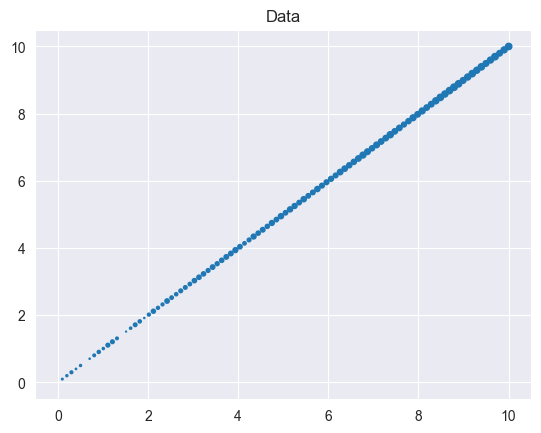

In [31]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('Machine-Learning-Course-main/data/prep-data-lab03.csv')
print(df, "\n")  
print(df.isnull().sum())

X1 = np.linspace(0, 10, 100)
y = 2 * X1 + 1 + np.random.randn(100) * 2
X2 = X1.reshape(-1, 1)

df = pd.DataFrame({'temperature': X1.flatten(), 'precipitation': X2.flatten(), 'bicycle_usage': y.flatten()})
print(df.head(10))

# plot the data
plt.scatter(X1,X2, y)
plt.title("Data")
plt.show()




In [33]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X1, y)

# Get the slope and intercept of the line best fit
print("Model coefficient:", model.coef_, "\n")
print("Model intercept:", model.intercept_, "\n")

# plot the data and the best fit line
plt.scatter(X1, y)
plt.plot(X1, model.predict(X1), color='red')
plt.legend(['Labeled Data', 'Best fit line'])
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with best fit line")
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8.28282828  8.38383838
  8.48484848  8.58585859  8.68686869  8.78787879  8.88888889  8.98989899
  9.09090909  9.19191919  9.29292929  9.39393939  9.49494949  9.5959596
  9.6969697   9.7979798   9.8989899  10.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [21]:
X = df[['temperature', 'precipitation']]
y = df['bicycle_usage']

poly = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_poly = poly.fit_transform(X)

model = LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X)

print("Model coefficient:", model.coef_, "\n")
print("Model intercept:", model.intercept_, "\n")

plt.scatter(X, y)
plt.title("Linear Regression with best fit line")
plt.show()

KeyError: "None of [Index(['temperature', 'precipitation'], dtype='object')] are in the [columns]"

In [22]:
# 1: Determining the degree of the polynomial
# Create a polynomial feature object with degree 2
# y = ß0 + ß1x + ß2x2 + ß3x3
poly = PolynomialFeatures(degree=3, include_bias=False)

# 2: Creating the new features
poly_features = poly.fit_transform(X.reshape(-1, 1))
print("Original features:", X[:5], "\n")
print("New features:", poly_features[:5], "\n")

Original features: [[0.       ]
 [0.1010101]
 [0.2020202]
 [0.3030303]
 [0.4040404]] 

New features: [[0.         0.         0.        ]
 [0.1010101  0.01020304 0.00103061]
 [0.2020202  0.04081216 0.00824488]
 [0.3030303  0.09182736 0.02782647]
 [0.4040404  0.16324865 0.06595905]] 



In [23]:
import numpy as np
import pandas as pd

df = pd.read_csv('Machine-Learning-Course-main/data/prep-data-lab03.csv')
print(df, "\n")  
print(df.isnull().sum())

np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
x_2 = np.absolute(np.random.randn(100, 1) * 30)
y = 2 * x_1 ** 2 + 3 * x_1 + 2 + np.random.randn(100, 1) * 20

    day  temperature  precipitation  bicycle_counts
0     1           22            0.0             150
1     2           19            2.5              87
2     3           17            0.0             108
3     4           21            0.0             162
4     5           18            4.1              65
..  ...          ...            ...             ...
95   96           24            0.0             235
96   97           19            1.9             118
97   98           17            0.0             107
98   99           21            0.0             180
99  100           23            0.0             227

[100 rows x 4 columns] 

day               0
temperature       0
precipitation     0
bicycle_counts    0
dtype: int64


In [24]:
# 1: Storing the variables in a dataframe
df = pd.DataFrame({'temperature': x_1.flatten(), 'precipitation': x_2.flatten(), 'bicycle_usage': y.flatten()})
print(df.head(10))

   temperature  precipitation  bicycle_usage
0    16.243454      13.413857     570.412369
1     6.117564      36.735231     111.681987
2     5.281718      12.104749      62.392124
3    10.729686      17.807356     303.538953
4     8.654076      32.847355     151.109269
5    23.015387       5.081473    1095.248464
6    17.448118      22.216694     630.203546
7     7.612069      28.611018     122.912285
8     3.190391       7.986555       9.546054
9     2.493704       0.978436      61.039806


In [25]:

# 2: Creating the new features
X, y = df[["temperature", "precipitation"]], df["bicycle_usage"]
poly_features = poly.fit_transform(X)
print("Original features:", X[:5], "\n")
print("New features:", poly_features[:5], "\n")

Original features:    temperature  precipitation
0    16.243454      13.413857
1     6.117564      36.735231
2     5.281718      12.104749
3    10.729686      17.807356
4     8.654076      32.847355 

New features: [[1.62434536e+01 1.34138569e+01 2.63849786e+02 2.17887363e+02
  1.79931558e+02 4.28583177e+03 3.53924328e+03 2.92270992e+03
  2.41357618e+03]
 [6.11756414e+00 3.67352311e+01 3.74245910e+01 2.24730133e+02
  1.34947721e+03 2.28947336e+02 1.37480100e+03 8.25551337e+03
  4.95733571e+04]
 [5.28171752e+00 1.21047493e+01 2.78965400e+01 6.39338662e+01
  1.46524954e+02 1.47341644e+02 3.37680622e+02 7.73903420e+02
  1.77364783e+03]
 [1.07296862e+01 1.78073557e+01 1.15126166e+02 1.91067339e+02
  3.17101917e+02 1.23526764e+03 2.05009260e+03 3.40240407e+03
  5.64674663e+03]
 [8.65407629e+00 3.28473554e+01 7.48930365e+01 2.84263519e+02
  1.07894875e+03 6.48130052e+02 2.46003818e+03 9.33730484e+03
  3.54406132e+04]] 



In [26]:
# 3: Creating the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [27]:
# Get the order of features to understand the polynomial regression
print("Feature ordering:", poly.get_feature_names_out())

# # Get the slope and intercept of the line best fit
print("Model coefficient:", poly_reg_model.coef_,)
print("Model intercept:", poly_reg_model.intercept_, "\n")

Feature ordering: ['temperature' 'precipitation' 'temperature^2' 'temperature precipitation'
 'precipitation^2' 'temperature^3' 'temperature^2 precipitation'
 'temperature precipitation^2' 'precipitation^3']
Model coefficient: [ 7.75575385e+00 -8.21086338e-01  1.62809098e+00 -9.50005146e-02
  2.61608549e-02  5.01802062e-03  4.06514730e-03  2.11184278e-04
 -1.70181194e-04]
Model intercept: 2.462613645922943 



In [28]:
# # Get y_pred
y_pred = poly_reg_model.predict(poly_features)

from sklearn.metrics import r2_score
poly_reg_r2 = r2_score(y, y_pred)
print("R Squared Error:", poly_reg_r2)

R Squared Error: 0.9938239883711046
